# EDA

In [1]:
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [4]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [18]:
#df_train_info = df_train.info() # int : 35, float : 3, categorical : 43

In [6]:
df_train.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### missing values

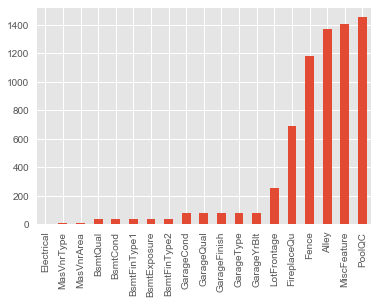

In [7]:
df_train_missing = df_train.isnull().sum()
df_train_missing = df_train_missing[df_train_missing > 0]
df_train_missing.sort_values(inplace = True)
df_train_missing.plot(kind = "bar")

### split quantative, categorical data

In [8]:
def extractQuanFromPD(data, index = None, target = None):
    quan_columns = [ c for c in data.columns if data[c].dtype != "object"]
   
    if(index != None):
        quan_columns.remove(id)
    if(target != None):
        quan_columns.remove(target)

    df_train_quan =  pd.DataFrame(data, columns = quan_columns)
    
    return df_train_quan

def extractQualFromPD(data, index = None, target = None):
    qual_columns = [ c for c in data.columns if data[c].dtype == "object"]
   
    if(index != None):
        qual_columns.remove(id)
    if(target != None):
        qual_columns.remove(target)

    df_train_qual =  pd.DataFrame(data, columns = qual_columns)
    
    return df_train_qual

In [9]:
df_train_quan = extractQuanFromPD(df_train, 'Id', 'SalePrice')
df_train_qual = extractQualFromPD(df_train)

### univariate-quantative value

#### non-graphical

In [10]:
df_train_quan.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


#### graphical

In [11]:
def dispUniQuan(data, size = (5, 5), kde = True, rug = False):
    n_data_columns = len(data.columns)
    col = 2
    row = n_data_columns // 2 if (n_data_columns % 2) == 0 else (n_data_columns // 2) + 1 

    f, axes = plt.subplots(row, col, figsize = (size[0]*col, size[1]*row))

    i = 0
    j = 0

    for c in data.columns:
        s_quan = data[c]

        if(s_quan.isnull().all() == False):
            s_quan.dropna(inplace = True)
        
        # display the distplot
        sns.distplot(s_quan, kde = kde, rug = rug, ax = axes[i, j])

        j+=1

        if j == 2:
            i += 1
            j = 0

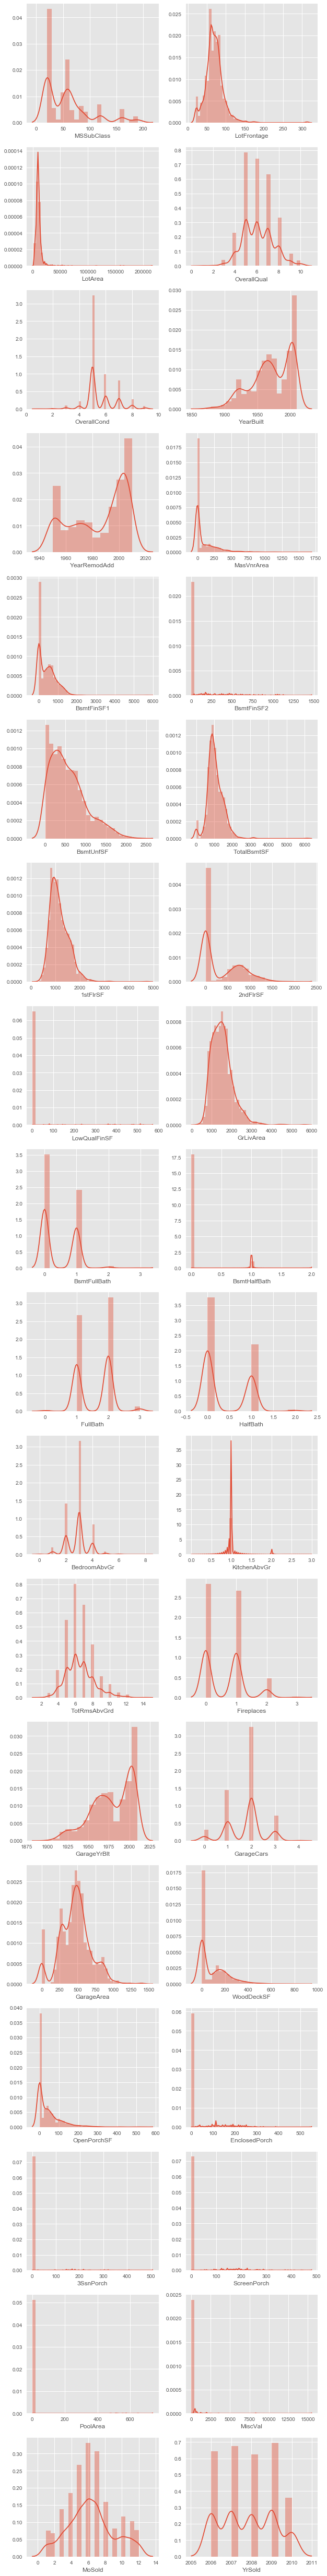

In [12]:
dispUniQuan(df_train_quan)

### univariate-qualitivity value

#### graphical

In [19]:
def dispUniQual(data, size = (5, 5)):
    n_data_columns = len(data.columns)
    col = 2
    row = n_data_columns // 2 if (n_data_columns % 2) == 0 else (n_data_columns // 2) + 1 

    f, axes = plt.subplots(row, col, figsize = (size[0]*col, size[1]*row))

    i = 0
    j = 0

    for c in data.columns:
        
        # display the countplot
        sns.countplot(x = c, data = data, ax = axes[i, j])

        j+=1

        if j == 2:
            i += 1
            j = 0

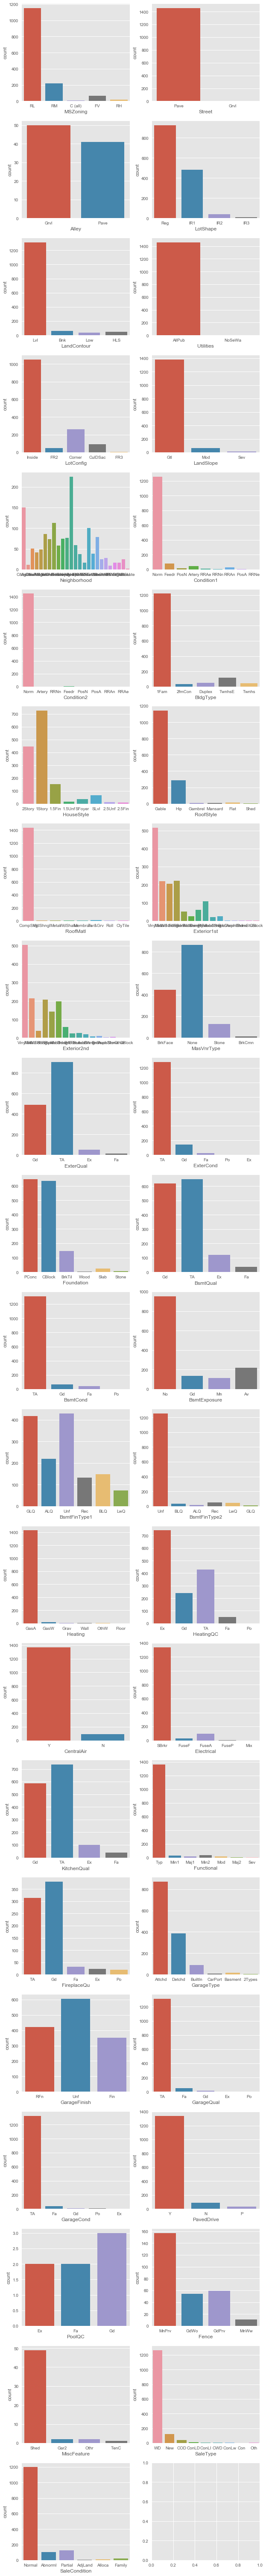

In [20]:
dispUniQual(df_train_qual)